In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel("Worksheet in _Budget_Allocation.xlsx")
df.head()

,PRDT TYPE,BRAND,MILESTONE,TARGET_GROUP,CAMPAIGN_MONTH,SELECTED_QTY,MAILED_COUNT,RESPONSE_COUNT,RESPONSE_SALES_AMT,CUST_SEGMENT
0,Prdt-1,B,12 Months,Targeted,AUGUST,809,809,98,23323.47,CLClubInvite12
1,Prdt-1,B,12 Months,Control,AUGUST,90,90,3,686.98,CLClubInvite12Control
2,Prdt-1,B,12 Months,Targeted,AUGUST,1769,1769,142,30641.22,CLRecall12
3,Prdt-1,B,12 Months,Control,AUGUST,196,196,16,3261.56,CLRecall12Control
4,Prdt-1,B,12 Months,Targeted,AUGUST,205,205,16,2848.48,CLRecallTXandCA12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PRDT TYPE           2360 non-null   object 
 1   BRAND               2360 non-null   object 
 2   MILESTONE           2360 non-null   object 
 3   TARGET_GROUP        2360 non-null   object 
 4   CAMPAIGN_MONTH      2360 non-null   object 
 5   SELECTED_QTY        2360 non-null   int64  
 6   MAILED_COUNT        2360 non-null   int64  
 7   RESPONSE_COUNT      2360 non-null   int64  
 8   RESPONSE_SALES_AMT  2360 non-null   float64
 9   CUST_SEGMENT        2360 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 184.5+ KB


In [4]:
for i in df.columns:
    print(i, "\n", df[i].sort_values().unique(), "\n")

PRDT TYPE 
 ['Prdt-1' 'Prdt-2'] 

BRAND 
 ['B' 'C' 'D' 'E'] 

MILESTONE 
 ['12 Months' '15 Months' '18 Months' '21 Months' '24 Months' '27 Months'] 

TARGET_GROUP 
 ['Control' 'Targeted'] 

CAMPAIGN_MONTH 
 ['APRIL' 'AUGUST' 'DECEMBER' 'JANUARY' 'JULY' 'JUNE' 'MAY' 'NOVEMBER'
 'OCTOBER'] 

SELECTED_QTY 
 [      6       7       8 ... 2545164 2554095 2599002] 

MAILED_COUNT 
 [    1     2     6 ... 21053 24066 24341] 

RESPONSE_COUNT 
 [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  102  103  104  105  106  108  109  110  111  113  114

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [6]:
df.columns

Index(['prdt_type', 'brand', 'milestone', 'target_group', 'campaign_month',
       'selected_qty', 'mailed_count', 'response_count', 'response_sales_amt',
       'cust_segment'],
      dtype='object')

In [7]:
df["response_rate_percentage"] = (df["response_count"] / df["mailed_count"])*100


In [8]:
df["sales_per_mailed"] = df["response_sales_amt"] / df["mailed_count"]

In [9]:
df

,prdt_type,brand,milestone,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,cust_segment,response_rate_percentage,sales_per_mailed
0,Prdt-1,B,12 Months,Targeted,AUGUST,809,809,98,23323.47,CLClubInvite12,12.113721,28.830000
1,Prdt-1,B,12 Months,Control,AUGUST,90,90,3,686.98,CLClubInvite12Control,3.333333,7.633111
2,Prdt-1,B,12 Months,Targeted,AUGUST,1769,1769,142,30641.22,CLRecall12,8.027134,17.321210
3,Prdt-1,B,12 Months,Control,AUGUST,196,196,16,3261.56,CLRecall12Control,8.163265,16.640612
4,Prdt-1,B,12 Months,Targeted,AUGUST,205,205,16,2848.48,CLRecallTXandCA12,7.804878,13.895024
...,...,...,...,...,...,...,...,...,...,...,...,...
2355,Prdt-2,E,27 Months,Control,OCTOBER,794,1,0,0.00,RecallNONFirstSight-CG,0.000000,0.000000
2356,Prdt-2,E,27 Months,Targeted,OCTOBER,64494,36,0,0.00,RecallNONFirstSight-TG,0.000000,0.000000
2357,Prdt-2,E,27 Months,Targeted,OCTOBER,71670,34,0,0.00,RecallNONFirstSight-TG,0.000000,0.000000
2358,Prdt-2,E,27 Months,Targeted,OCTOBER,94402,1313,6,398.00,RecallNONFirstSight-TG,0.456969,0.303123


In [10]:
#Response Rate by Target Group
grouped_analysis = df.groupby("target_group").agg(
    total_mailed=("mailed_count", "sum"),
    total_responded=("response_count", "sum"),
    total_sales_amt=("response_sales_amt", "sum")
).reset_index()


In [11]:
grouped_analysis["response_rate_percentage"] = grouped_analysis["total_responded"] / grouped_analysis["total_mailed"]*100
grouped_analysis["sales_per_mailed"] = grouped_analysis["total_sales_amt"] / grouped_analysis["total_mailed"]

In [12]:
grouped_analysis

,target_group,total_mailed,total_responded,total_sales_amt,response_rate_percentage,sales_per_mailed
0,Control,318178,10328,2200703.63,3.245982,6.916580
1,Targeted,2895599,99751,21549764.57,3.444918,7.442248


Text(0.5, 0, 'Target Group')

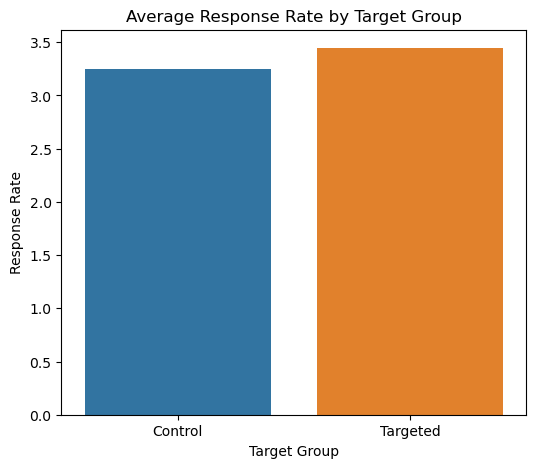

In [14]:
plt.figure(figsize=(6, 5))
sns.barplot(x="target_group", y="response_rate_percentage", data=grouped_analysis, estimator=np.mean, ci=None)
plt.title("Average Response Rate by Target Group")
plt.ylabel("Response Rate")
plt.xlabel("Target Group")

In [15]:
#Average response rate by milestone 
df.groupby("milestone")["response_rate_percentage"].mean().sort_values(ascending=False)


milestone
12 Months    7.201225
15 Months    3.862079
18 Months    2.835218
24 Months    2.726411
21 Months    2.670056
27 Months    1.791325
Name: response_rate_percentage, dtype: float64

Text(0, 0.5, 'Milestone')

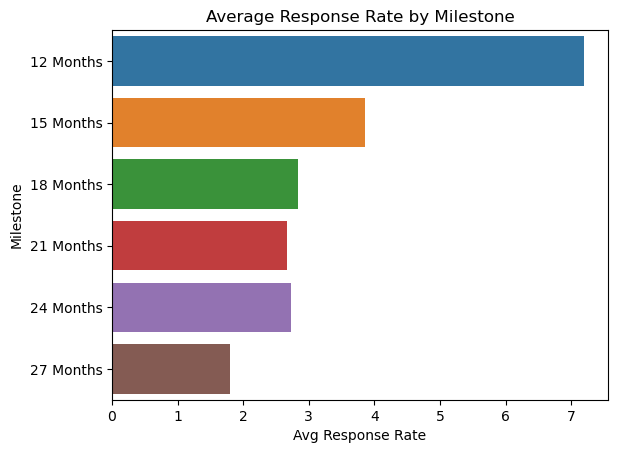

In [16]:
sns.barplot(x="response_rate_percentage", y="milestone", data=df, estimator=np.mean,ci=None)
plt.title("Average Response Rate by Milestone")
plt.xlabel("Avg Response Rate")
plt.ylabel("Milestone")                  

In [17]:
#Effectiveness of Targeted Campaigns by Product Type

product_comparison = df.groupby(["prdt_type", "target_group"]).agg(
    mailed_count=("mailed_count", "sum"),
    response_count=("response_count", "sum"),
).reset_index()



In [18]:

product_comparison["response_rate"] = product_comparison["response_count"] / product_comparison["mailed_count"]

In [19]:

product_pivot = product_comparison.pivot(index="prdt_type", columns="target_group", values="response_rate")

In [20]:
product_comparison

,prdt_type,target_group,mailed_count,response_count,response_rate
0,Prdt-1,Control,42886,2078,0.048454
1,Prdt-1,Targeted,385649,19755,0.051225
2,Prdt-2,Control,275292,8250,0.029968
3,Prdt-2,Targeted,2509950,79996,0.031872


In [21]:
product_pivot

target_group,Control,Targeted
prdt_type,,
Prdt-1,0.048454,0.051225
Prdt-2,0.029968,0.031872


(array([0, 1]), [Text(0, 0, 'Prdt-1'), Text(1, 0, 'Prdt-2')])

<Figure size 1000x600 with 0 Axes>

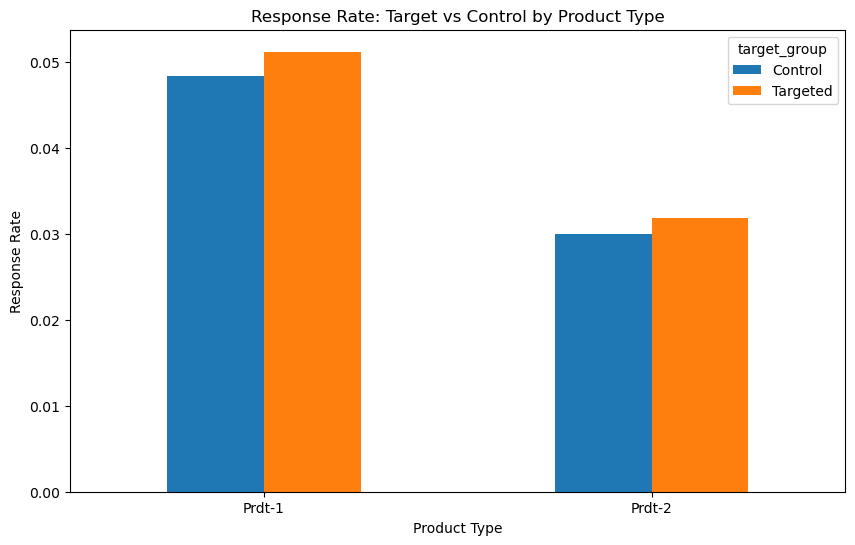

In [22]:
plt.figure(figsize=(10, 6))
product_pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Response Rate: Target vs Control by Product Type")
plt.ylabel("Response Rate")
plt.xlabel("Product Type")
plt.xticks(rotation=0)


In [23]:
#Campaign Performance by Month
month_comparison = df.groupby(["campaign_month", "target_group"]).agg(
    mailed_count=("mailed_count", "sum"),
    response_count=("response_count", "sum"),
).reset_index()


In [24]:

month_comparison["response_rate"] = month_comparison["response_count"] / month_comparison["mailed_count"]

In [25]:

month_pivot = month_comparison.pivot(index="campaign_month", columns="target_group", values="response_rate")

In [26]:
month_comparison

,campaign_month,target_group,mailed_count,response_count,response_rate
0,APRIL,Control,2367,66,0.027883
1,APRIL,Targeted,21313,731,0.034298
2,AUGUST,Control,39952,1156,0.028935
3,AUGUST,Targeted,372180,11460,0.030792
4,DECEMBER,Control,39743,1546,0.038900
5,DECEMBER,Targeted,357876,14869,0.041548
6,JANUARY,Control,29288,1175,0.040119
7,JANUARY,Targeted,263696,11284,0.042792
8,JULY,Control,36659,1157,0.031561
9,JULY,Targeted,340652,11264,0.033066


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'APRIL'),
  Text(1, 0, 'AUGUST'),
  Text(2, 0, 'DECEMBER'),
  Text(3, 0, 'JANUARY'),
  Text(4, 0, 'JULY'),
  Text(5, 0, 'JUNE'),
  Text(6, 0, 'MAY'),
  Text(7, 0, 'NOVEMBER'),
  Text(8, 0, 'OCTOBER')])

<Figure size 1000x600 with 0 Axes>

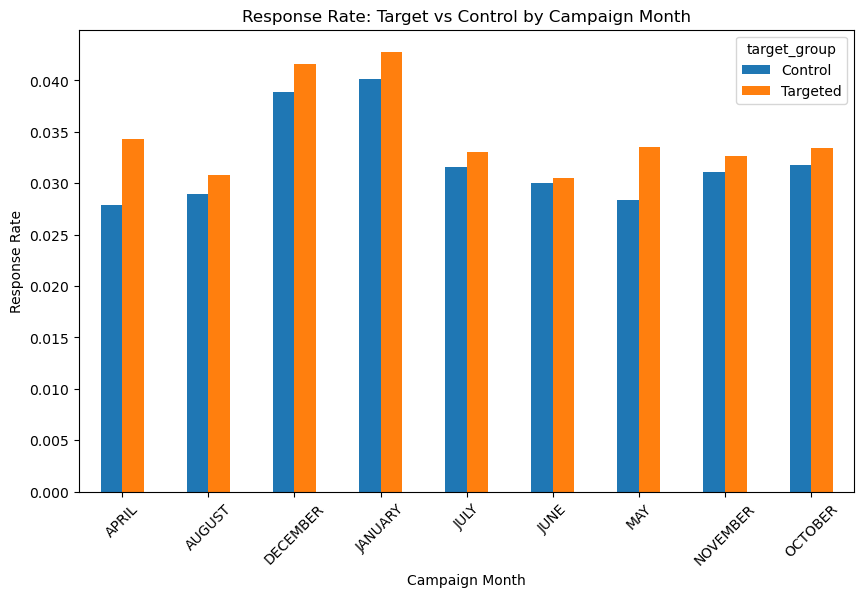

In [27]:

# Plot: Target vs Control response rate by campaign month
plt.figure(figsize=(10, 6))
month_pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Response Rate: Target vs Control by Campaign Month")
plt.ylabel("Response Rate")
plt.xlabel("Campaign Month")
plt.xticks(rotation=45)


In [30]:
df.to_csv("campaign_data_cleaned.csv", index=False)

In [31]:
df

,prdt_type,brand,milestone,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,cust_segment,response_rate_percentage,sales_per_mailed
0,Prdt-1,B,12 Months,Targeted,AUGUST,809,809,98,23323.47,CLClubInvite12,12.113721,28.830000
1,Prdt-1,B,12 Months,Control,AUGUST,90,90,3,686.98,CLClubInvite12Control,3.333333,7.633111
2,Prdt-1,B,12 Months,Targeted,AUGUST,1769,1769,142,30641.22,CLRecall12,8.027134,17.321210
3,Prdt-1,B,12 Months,Control,AUGUST,196,196,16,3261.56,CLRecall12Control,8.163265,16.640612
4,Prdt-1,B,12 Months,Targeted,AUGUST,205,205,16,2848.48,CLRecallTXandCA12,7.804878,13.895024
...,...,...,...,...,...,...,...,...,...,...,...,...
2355,Prdt-2,E,27 Months,Control,OCTOBER,794,1,0,0.00,RecallNONFirstSight-CG,0.000000,0.000000
2356,Prdt-2,E,27 Months,Targeted,OCTOBER,64494,36,0,0.00,RecallNONFirstSight-TG,0.000000,0.000000
2357,Prdt-2,E,27 Months,Targeted,OCTOBER,71670,34,0,0.00,RecallNONFirstSight-TG,0.000000,0.000000
2358,Prdt-2,E,27 Months,Targeted,OCTOBER,94402,1313,6,398.00,RecallNONFirstSight-TG,0.456969,0.303123
